In [1]:
import pandas  as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('titanic_dataset.csv')

In [4]:
data.shape

(1309, 14)

In [5]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [6]:
data.corr()

,pclass,survived,sibsp,parch
pclass,1.000000,-0.312469,0.060832,0.018322
survived,-0.312469,1.000000,-0.027825,0.082660
sibsp,0.060832,-0.027825,1.000000,0.373587
parch,0.018322,0.082660,0.373587,1.000000


In [7]:
data.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [8]:
data['sex'] = data['sex'].map({'female' : 1, 'male' : 0})

In [9]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [10]:
df1 = data[['pclass','survived', 'sex', 'age', 'sibsp', 'parch']]

In [11]:
df1.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,1,29,0,0
1,1,1,0,0.9167,1,2
2,1,0,1,2,1,2
3,1,0,0,30,1,2
4,1,0,1,25,1,2


In [12]:
df1.tail()

,pclass,survived,sex,age,sibsp,parch
1304,3,0,1,14.5,1,0
1305,3,0,1,?,1,0
1306,3,0,0,26.5,0,0
1307,3,0,0,27,0,0
1308,3,0,0,29,0,0


In [13]:
df1.isna().any()

pclass      False
survived    False
sex         False
age         False
sibsp       False
parch       False
dtype: bool

In [14]:
df1['age']

0           29
1       0.9167
2            2
3           30
4           25
5           48
6           63
7           39
8           53
9           71
10          47
11          18
12          24
13          26
14          80
15           ?
16          24
17          50
18          32
19          36
20          37
21          47
22          26
23          42
24          29
25          25
26          25
27          19
28          35
29          28
         ...  
1279        14
1280        22
1281        22
1282         ?
1283         ?
1284         ?
1285      32.5
1286        38
1287        51
1288        18
1289        21
1290        47
1291         ?
1292         ?
1293         ?
1294      28.5
1295        21
1296        27
1297         ?
1298        36
1299        27
1300        15
1301      45.5
1302         ?
1303         ?
1304      14.5
1305         ?
1306      26.5
1307        27
1308        29
Name: age, Length: 1309, dtype: object

In [15]:
df1['age'].replace('?','0', inplace = True)

E:\ajeet_data\conda\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
df1.age

0           29
1       0.9167
2            2
3           30
4           25
5           48
6           63
7           39
8           53
9           71
10          47
11          18
12          24
13          26
14          80
15           0
16          24
17          50
18          32
19          36
20          37
21          47
22          26
23          42
24          29
25          25
26          25
27          19
28          35
29          28
         ...  
1279        14
1280        22
1281        22
1282         0
1283         0
1284         0
1285      32.5
1286        38
1287        51
1288        18
1289        21
1290        47
1291         0
1292         0
1293         0
1294      28.5
1295        21
1296        27
1297         0
1298        36
1299        27
1300        15
1301      45.5
1302         0
1303         0
1304      14.5
1305         0
1306      26.5
1307        27
1308        29
Name: age, Length: 1309, dtype: object

In [17]:
df1['age'] = df1['age'].astype(float)

E:\ajeet_data\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1['age'].isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [19]:
df1['age'].replace(0,df1.age.mean(), inplace = True)

In [20]:
df1.age

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
5       48.000000
6       63.000000
7       39.000000
8       53.000000
9       71.000000
10      47.000000
11      18.000000
12      24.000000
13      26.000000
14      80.000000
15      23.877515
16      24.000000
17      50.000000
18      32.000000
19      36.000000
20      37.000000
21      47.000000
22      26.000000
23      42.000000
24      29.000000
25      25.000000
26      25.000000
27      19.000000
28      35.000000
29      28.000000
          ...    
1279    14.000000
1280    22.000000
1281    22.000000
1282    23.877515
1283    23.877515
1284    23.877515
1285    32.500000
1286    38.000000
1287    51.000000
1288    18.000000
1289    21.000000
1290    47.000000
1291    23.877515
1292    23.877515
1293    23.877515
1294    28.500000
1295    21.000000
1296    27.000000
1297    23.877515
1298    36.000000
1299    27.000000
1300    15.000000
1301    45.500000
1302    23.877515
1303    23

In [21]:
df1.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,1,29.0000,0,0
1,1,1,0,0.9167,1,2
2,1,0,1,2.0000,1,2
3,1,0,0,30.0000,1,2
4,1,0,1,25.0000,1,2


In [22]:
df1['pclass']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1279    3
1280    3
1281    3
1282    3
1283    3
1284    3
1285    3
1286    3
1287    3
1288    3
1289    3
1290    3
1291    3
1292    3
1293    3
1294    3
1295    3
1296    3
1297    3
1298    3
1299    3
1300    3
1301    3
1302    3
1303    3
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [23]:
df1['first_class'] = df1['pclass'].apply(lambda x : 1 if x == 1 else 0)

E:\ajeet_data\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df1.head()

,pclass,survived,sex,age,sibsp,parch,first_class
0,1,1,1,29.0000,0,0,1
1,1,1,0,0.9167,1,2,1
2,1,0,1,2.0000,1,2,1
3,1,0,0,30.0000,1,2,1
4,1,0,1,25.0000,1,2,1


In [25]:
df1['second_class'] = df1['pclass'].apply(lambda x : 1 if x == 2 else 0)

E:\ajeet_data\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df1['third_class'] = df1['pclass'].apply(lambda x : 1 if x ==3 else 0)

E:\ajeet_data\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df1.head()

,pclass,survived,sex,age,sibsp,parch,first_class,second_class,third_class
0,1,1,1,29.0000,0,0,1,0,0
1,1,1,0,0.9167,1,2,1,0,0
2,1,0,1,2.0000,1,2,1,0,0
3,1,0,0,30.0000,1,2,1,0,0
4,1,0,1,25.0000,1,2,1,0,0


In [28]:
df1.tail()

,pclass,survived,sex,age,sibsp,parch,first_class,second_class,third_class
1304,3,0,1,14.500000,1,0,0,0,1
1305,3,0,1,23.877515,1,0,0,0,1
1306,3,0,0,26.500000,0,0,0,0,1
1307,3,0,0,27.000000,0,0,0,0,1
1308,3,0,0,29.000000,0,0,0,0,1


In [29]:
# feartues1 = ['first_class','age', 'second_class','third_class','']


In [30]:
df1.corr()

,pclass,survived,sex,age,sibsp,parch,first_class,second_class,third_class
pclass,1.000000,-0.312469,-0.124617,-0.398366,0.060832,0.018322,-0.884911,-0.182413,0.915201
survived,-0.312469,1.000000,0.528693,-0.029561,-0.027825,0.082660,0.279449,0.050790,-0.283428
sex,-0.124617,0.528693,1.000000,-0.044996,0.109609,0.213125,0.107371,0.028862,-0.116562
age,-0.398366,-0.029561,-0.044996,1.000000,-0.186092,-0.113570,0.377450,0.020035,-0.343012
sibsp,0.060832,-0.027825,0.109609,-0.186092,1.000000,0.373587,-0.034256,-0.052419,0.072610
parch,0.018322,0.082660,0.213125,-0.113570,0.373587,1.000000,-0.013033,-0.010057,0.019521
first_class,-0.884911,0.279449,0.107371,0.377450,-0.034256,-0.013033,1.000000,-0.296526,-0.622172
second_class,-0.182413,0.050790,0.028862,0.020035,-0.052419,-0.010057,-0.296526,1.000000,-0.563180
third_class,0.915201,-0.283428,-0.116562,-0.343012,0.072610,0.019521,-0.622172,-0.563180,1.000000


In [31]:
target = df1['survived']
features = df1.drop(['survived','pclass','sibsp','parch'], axis = 1)

In [32]:
features.head()

,sex,age,first_class,second_class,third_class
0,1,29.0000,1,0,0
1,0,0.9167,1,0,0
2,1,2.0000,1,0,0
3,0,30.0000,1,0,0
4,1,25.0000,1,0,0


In [33]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

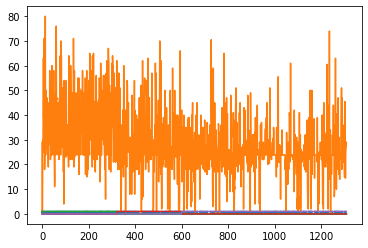

In [35]:
plt.plot(features)
plt.show()

In [36]:
scaler = StandardScaler()
features = scaler.fit_transform(features)


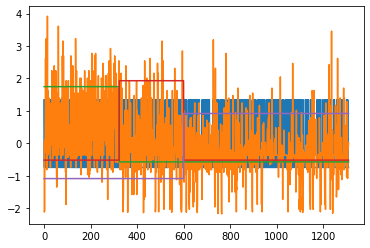

In [37]:
plt.plot(features)
plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state = 42)

In [39]:
model = LogisticRegression()
model.fit(x_train, y_train)

E:\ajeet_data\conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model.score(x_train, y_train)

0.792741165234002

In [41]:
#score on test data
model.score(x_test, y_test)

0.7748091603053435

In [42]:
#checking the model's coefficients 

print(list(zip(['sex','age', 'first_class','second_class','third_class'], model.coef_[0])))

[('sex', 1.2083764314551506), ('age', -0.35944515836959673), ('first_class', 0.48673202486748385), ('second_class', 0.029510003584895833), ('third_class', -0.4453350727544056)]


In [43]:
from sklearn.metrics import f1_score
score = f1_score(model.predict(x_test),y_test)

In [44]:
score  #score is pretty good 

0.7177033492822967

In [45]:
#let's save our model
from joblib import dump, load

dump(model,'titanic_Logistic_rgr_model')

['titanic_Logistic_rgr_model']

In [46]:
model1 = load('titanic_Logistic_rgr_model')

In [47]:
#testing our model's predictions
ack = np.array([0.0,20.0,0.0,0.0,1])
Rose = np.array([1.0,17.0,1.0,0.0,0.0])

passengers = np.array([ack,Rose])

#scaling data
passengers = scaler.fit_transform(passengers)





In [48]:
print(model.predict(passengers))

[0 1]
